### Dataset - 2 50_Startups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.shape

(50, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
data["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [21]:
data = pd.concat([data ,pd.get_dummies(data['State'], drop_first=True)], axis = 1)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [22]:
data.drop("State", axis = 1, inplace=True)

In [23]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [24]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


#### Observation
1. R&D Spend and Profit has very strong positive corr. Hence it can be a very important feature.
2. Also Profit and Marketing Spend has very positive Corr.Hence it can be a very important feature.

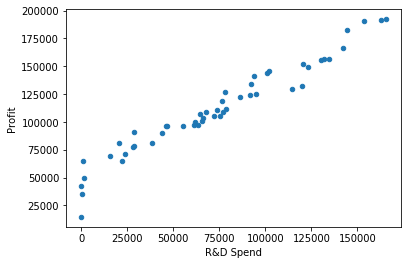

In [25]:
data.plot(x="R&D Spend", y="Profit", kind = "scatter")

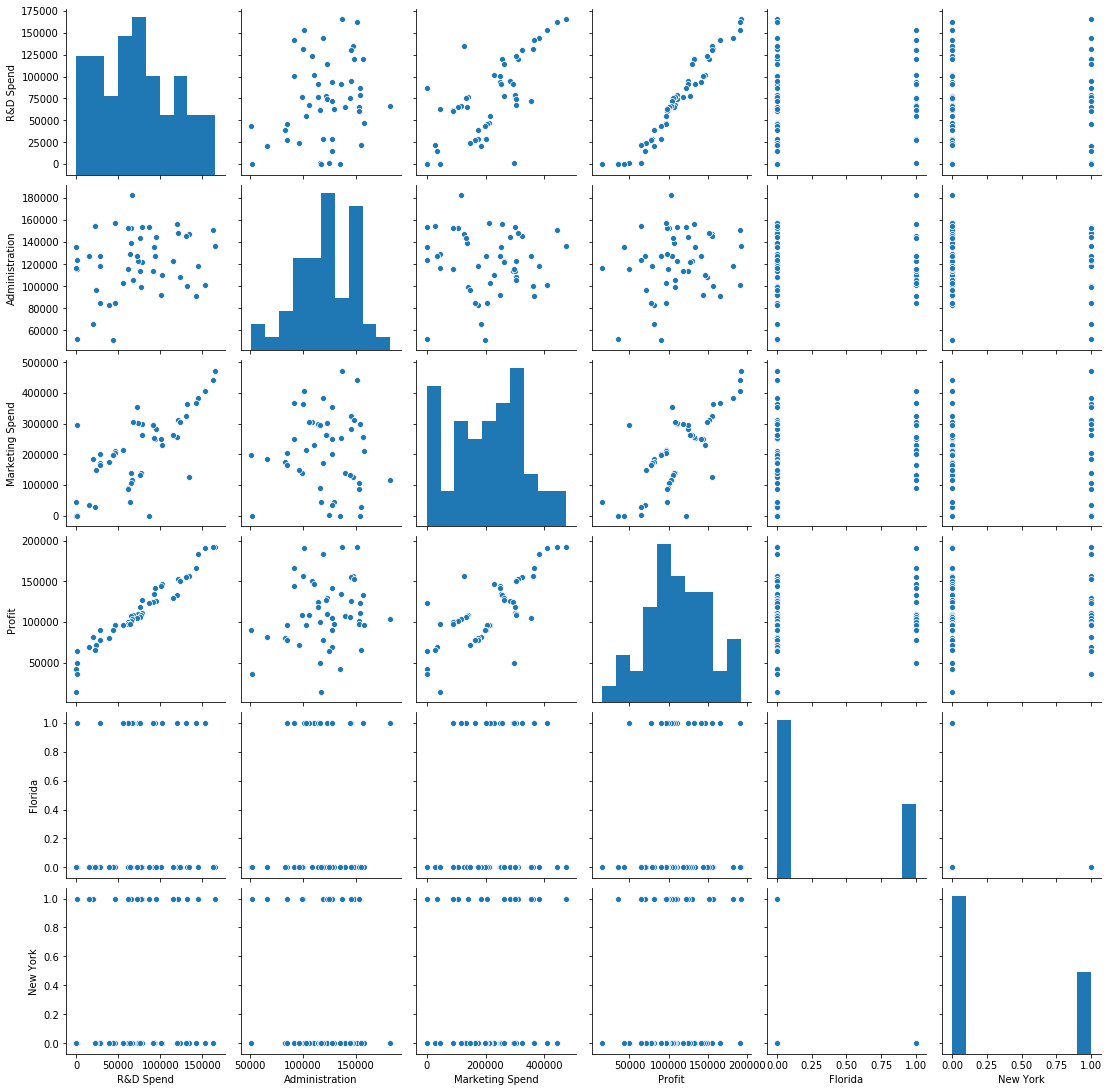

In [26]:
sns.pairplot(data=data)

#### Observation
* There are some outlier point In R&D Spend vs Profit plot

In [28]:
X = data.iloc[:,[0,1,2,4,5]].values
y = data.iloc[:,3].values

In [29]:
X.shape

(50, 5)

In [30]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
# Applying models

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

print(sqrt(mse(y_test,y_pred)))

9137.990152794944


In [39]:
import statsmodels.regression.linear_model as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
model_ols = sm.OLS(endog = y, exog= X_opt).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sat, 18 Jul 2020   Prob (F-statistic):           7.29e-31
Time:                        18:02:14   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.372e+04   1504.180      9.122      0.000    1.07e+04    1.67e+04
x1          1.372e+04   1504.180      9.122      0.000    1.07e+04    1.67e+04
x2          1.372e+04   1504.180      9.122      0.000    1.07e+04    1.67e+04
x3          1.372e+04   1504.180      9.122      0.000    1.07e+04    1.67e+04
x4             0.8621      0.030     28.589      0.000       0.801       0.923
x5            -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     8.63e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.45e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
df = pd.DataFrame(X_opt)
df.head()

,0,1,2,3,4,5
0,1.0,165349.20,136897.80,471784.10,0.0,1.0
1,1.0,162597.70,151377.59,443898.53,0.0,0.0
2,1.0,153441.51,101145.55,407934.54,1.0,0.0
3,1.0,144372.41,118671.85,383199.62,0.0,1.0
4,1.0,142107.34,91391.77,366168.42,1.0,0.0
